In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from tensorflow.examples.tutorials.mnist import input_data
mnist2 = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [14]:
from tensorflow.keras.datasets import mnist
#Importing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_vector_size = 28*28
#Normalization
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [15]:
#Parameters
learning_rate = 0.001
training_epoch = 200
N = 784
n_hidden_1 = 392
n_hidden_2 = 196
n_hidden_3 = 3
n_hidden_4 = 392
batch_size = 50
n_input = N
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder("float",[None,n_input])
test_examples = 1000
import numpy as np
random_indexs = np.random.randint(low=0,high=len(x_test)-1,size = test_examples)

In [16]:
#1st Hidden layer N/2
weight_hidden_1 = tf.Variable(tf.truncated_normal([n_input,n_hidden_1],stddev=0.1))
bias_hidden_1   = tf.Variable(tf.constant(0.1,shape = [n_hidden_1]))
output_hidden_1 = tf.nn.relu(tf.add(tf.matmul(x,weight_hidden_1),bias_hidden_1))

In [17]:
#2nd Hidden Layer N/4
weight_hidden_2 = tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2],stddev=0.1))
bias_hidden_2   = tf.Variable(tf.constant(0.1,shape=[n_hidden_2]))
output_hidden_2 = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_1,weight_hidden_2),bias_hidden_2))

In [18]:
#3rd Hidden Layer 2
weight_hidden_3 = tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3],stddev=0.1))
bias_hidden_3   = tf.Variable(tf.constant(0.1,shape=[n_hidden_3]))
output_hidden_3 = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_2,weight_hidden_3),bias_hidden_3))

In [19]:
#4th Hidden Layer N/2
weight_hidden_4 = tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4],stddev=0.1))
bias_hidden_4   = tf.Variable(tf.constant(0.1,shape=[n_hidden_4]))
output_hidden_4 = tf.nn.relu(tf.add(tf.matmul(output_hidden_3,weight_hidden_4),bias_hidden_4))

In [20]:
#Output Layer N
weight_output = tf.Variable(tf.truncated_normal([n_hidden_4,n_input],stddev=0.1))
bias_output   = tf.Variable(tf.constant(0.1,shape=[n_input]))
output_output = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_4,weight_output),bias_output))

In [21]:
loss = tf.reduce_mean(tf.squared_difference(y,output_output))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

In [22]:
test_image = tf.placeholder("float",[28,28])
test = tf.reshape(test_image,[-1])

In [23]:
init = tf.global_variables_initializer()
error_list=[]
y_axis = []
x_axis = []
z_axis = []
label  = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epoch):        
        total_batch = int(mnist2.train.num_examples / batch_size)             
        for i in range(total_batch):                     
            batch_xs, batch_ys = mnist2.train.next_batch(batch_size)                  
            sess.run(optimizer,feed_dict={
                x:batch_xs,
                y:batch_xs
            })
        error_list.append(sess.run(loss,feed_dict={
            x: mnist2.test.images,
            y: mnist2.test.images
        }))
        clear_output(wait=True)
        print("epochs completed",((epoch+1)/training_epoch)*100,"%")                
    
    
    
    for i in range(test_examples):
        
        features = sess.run(output_hidden_3,feed_dict={
            x:[x_test[i]]
        })
        
        
        
        y_axis.append(features[0][0])
        x_axis.append(features[0][1])
        z_axis.append(features[0][2])
        label.append(y_test[i])
    
    
           
    

epochs completed 100.0 %


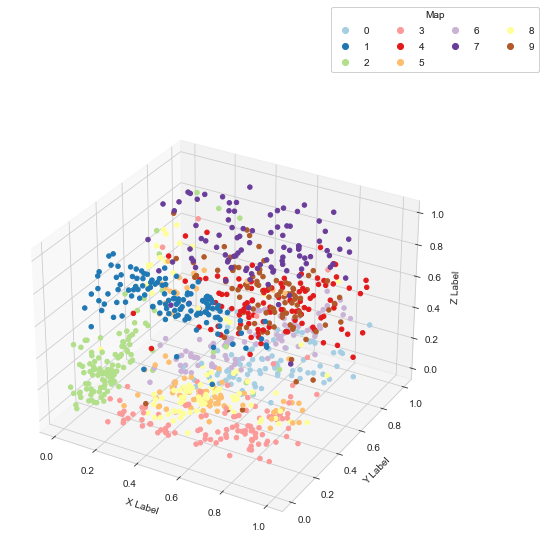

In [25]:
# %matplotlib notebook

import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
g = ax.scatter(x_axis,y_axis,z_axis ,
               c=label ,
               marker='o' ,
               depthshade=False ,
              cmap="Paired")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="best", title="Map", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
plt.show()


In [24]:
# epoch_list = []
# for i in range(training_epoch):
#     epoch_list.append(i+1)
# plt.plot(epoch_list,error_list)
# plt.xlabel("epoch->")
# plt.ylabel("MSE")
# print(error_list[len(error_list)-1])

ERROR! Session/line number was not unique in database. History logging moved to new session 515
